In [1]:
%pip install numpy
%pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/3x/0wljhxm92zggbn44wykp4r380000gn/T/ipykernel_20862/1172123145.py:12: RuntimeWarning: divide by zero encountered in divide
  t_bracket = ((1-t)**2)/ (t**2)


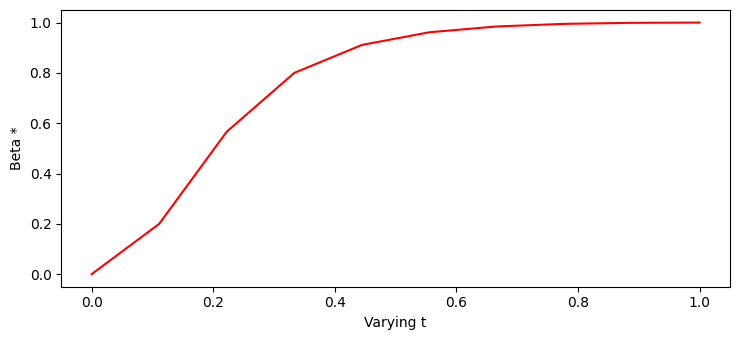

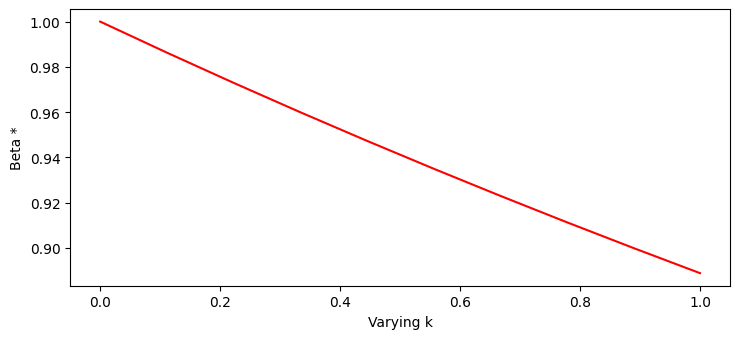

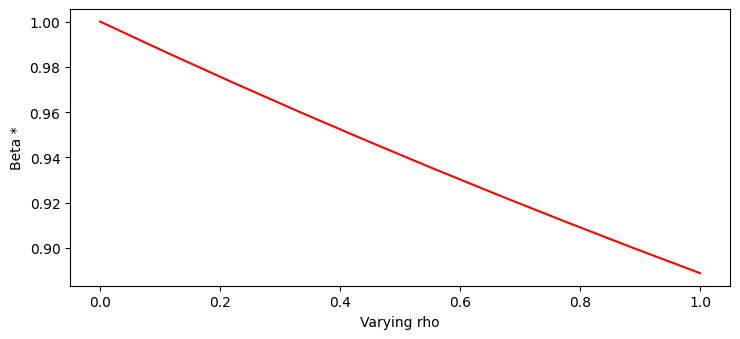

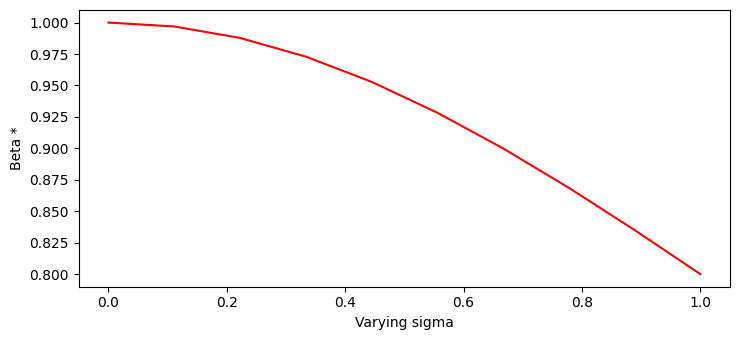

In [2]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def f(variables):
   t = variables["t"]
   k = variables["k"]
   rho = variables["rho"]
   sigma = variables["sigma"]
   t_bracket = ((1-t)**2)/ (t**2) 
   return 1/(1 + (k*rho*(sigma**2)*t_bracket))

def main():
    variables = {
        "t" : 0.5,
        "k" : 0.5,
        "rho" : 0.5,
        "sigma" : 0.5
    }   
    for key, value in variables.items():
        variables[key] = np.linspace(0,1,10)
        plt.plot(variables[key], f(variables), color='red')
        variables[key] = 0.5
        plt.xlabel(f"Varying {key}")
        plt.ylabel("Beta *")
        plt.show()

main()

/var/folders/3x/0wljhxm92zggbn44wykp4r380000gn/T/ipykernel_20862/68950024.py:16: RuntimeWarning: divide by zero encountered in divide
  t_bracket = ((1-t)**2)/ (t**2)
/var/folders/3x/0wljhxm92zggbn44wykp4r380000gn/T/ipykernel_20862/68950024.py:17: RuntimeWarning: invalid value encountered in multiply
  beta_star = 1/(1 + (k*rho*(sigma**2)*t_bracket))
/var/folders/3x/0wljhxm92zggbn44wykp4r380000gn/T/ipykernel_20862/68950024.py:24: RuntimeWarning: invalid value encountered in divide
  return numerator/denominator


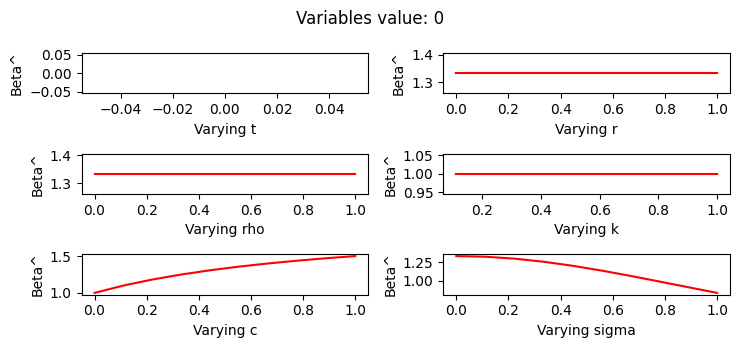

/var/folders/3x/0wljhxm92zggbn44wykp4r380000gn/T/ipykernel_20862/68950024.py:24: RuntimeWarning: divide by zero encountered in divide
  return numerator/denominator


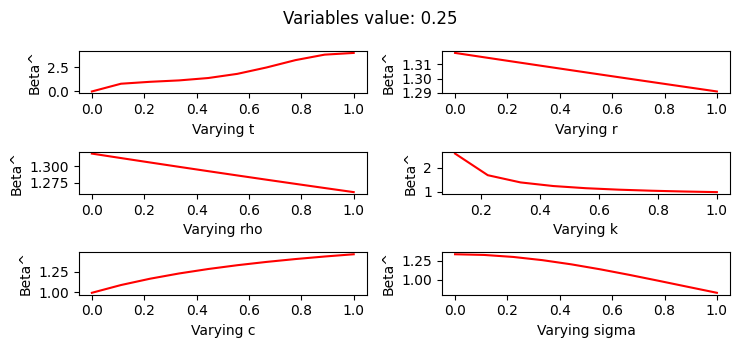

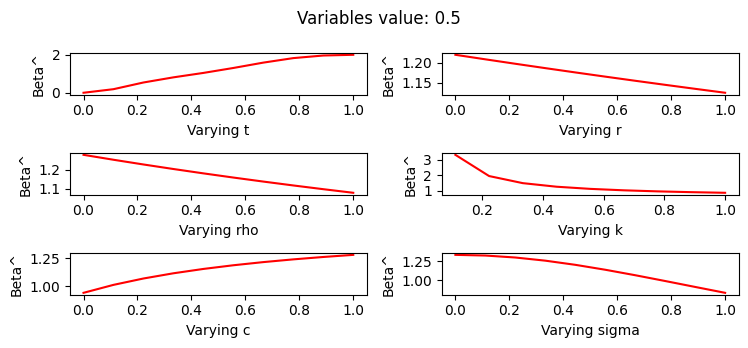

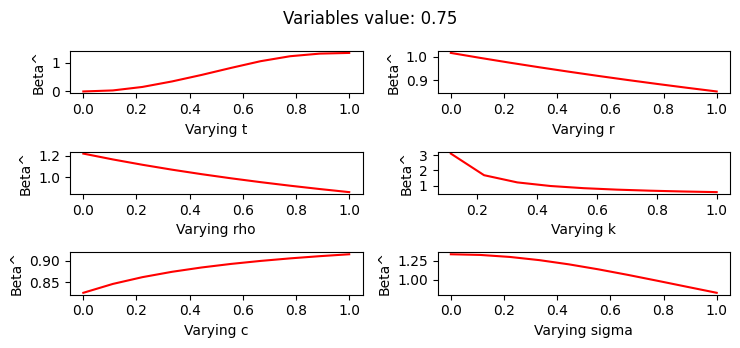

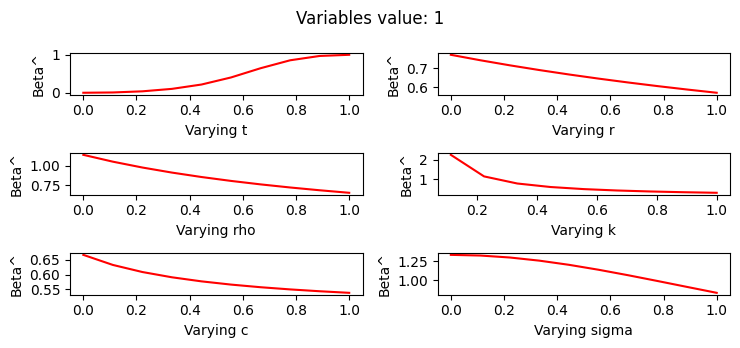

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def f(variables):
   t = variables["t"]
   k = variables["k"]
   c = variables["c"]
   r = variables["r"]
   rho = variables["rho"]
   sigma = variables["sigma"]

   t_bracket = ((1-t)**2)/ (t**2)  
   beta_star = 1/(1 + (k*rho*(sigma**2)*t_bracket))
   
   numerator = (((1-t)**2 * beta_star * k) + (t**2) * (beta_star**2) * c)
   den1 = (r*c*k*(sigma**2)) * ((1-t)**2)
   den2 = ((1-t)**2) * k
   den3 = (beta_star**2)*c*k*((t**2) + rho*(sigma**2)*((1-t)**2))
   denominator = den1 + den2 + den3
   return numerator/denominator

def main():
    with PdfPages("graphs.pdf") as pdf:
        intial_values = [0, 0.25, 0.5, 0.75, 1]
        for i_value in intial_values:
            variable_names = ["t", "k", "c", "r", "rho", "sigma"]
            variables = {}
            for name in variable_names:
                variables[name] = i_value
            figure, axis = plt.subplots(3, 2)
            count = 0
            for key, value in variables.items():
                variables[key] = np.linspace(0,1,10)
                axis[count%3, count%2].plot(variables[key], f(variables), color='red')
                variables[key] = 0.5
                axis[count%3, count%2].set(xlabel=f"Varying {key}", ylabel="Beta^")
                count +=1
            figure.suptitle(f"Variables value: {i_value}")
            plt.show()
            
            figure.savefig(pdf, format='pdf')

main()